In [4]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
connection = sqlite3.connect("mydatabase.db")

In [6]:
df=pd.read_csv("SpaceX_Data_Cleaned.csv")
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,8183.607718,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B0007,-80.577366,28.561857,0
3,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B1004,-80.577366,28.561857,0
4,6,2014-01-06,Falcon 9,3325.000000,GTO,CCSFS SLC 40,None None,1.0,False,False,False,1.0,0.0,B1005,-80.577366,28.561857,0


In [7]:
df.to_sql("SpaceX_Data_Cleaned", connection, if_exists='replace', index=False)


142

#Display Names of unique launch sites

In [8]:
query = "SELECT DISTINCT LAUNCHSITE FROM SpaceX_Data_Cleaned"
unique_launches = pd.read_sql_query(query, connection)

print(unique_launches)

     LaunchSite
0  CCSFS SLC 40
1    KSC LC 39A


#Display 5 records where launch sites begin with the string 'CC'

In [9]:
query = "SELECT * FROM SpaceX_Data_Cleaned WHERE LAUNCHSITE LIKE 'CC%' LIMIT 5"
records = pd.read_sql_query(query, connection)

print(records)

   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  8183.607718   LEO  CCSFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCSFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCSFS SLC 40   
3             5  2013-12-03       Falcon 9  3170.000000   GTO  CCSFS SLC 40   
4             6  2014-01-06       Falcon 9  3325.000000   GTO  CCSFS SLC 40   

     Outcome  Flights  GridFins  Reused  Legs  Block  ReusedCount Serial  \
0  None None      1.0         0       0     0    1.0          0.0  B0003   
1  None None      1.0         0       0     0    1.0          0.0  B0005   
2  None None      1.0         0       0     0    1.0          0.0  B0007   
3  None None      1.0         0       0     0    1.0          0.0  B1004   
4  None None      1.0         0       0     0    1.0          0.0  B1005   

   Longitude   Latitude  Class  
0 -80.577366  28.561857      0  
1 

#Display average payload mass carried by booster version Falcon 9

In [10]:
query = "SELECT avg(PAYLOADMASS) FROM SpaceX_Data_Cleaned WHERE BOOSTERVERSION = 'Falcon 9'"
records = pd.read_sql_query(query, connection)

print(records)

   avg(PAYLOADMASS)
0       8238.638763


#List the date when the first successful landing outcome on ground pad was achieved

In [11]:
query = "SELECT DATE FROM SpaceX_Data_Cleaned WHERE OUTCOME = 'True RTLS' LIMIT 1"
records = pd.read_sql_query(query, connection)

print(records)

         Date
0  2015-12-22


#List the names of the boosters which had success on a drone ship and a payload mas between 4000 and 6000 kg

In [12]:
query = "SELECT Distinct BOOSTERVERSION FROM SpaceX_Data_Cleaned WHERE OUTCOME = 'True ASDS' and PAYLOADMASS > 4000 and PAYLOADMASS < 6000"
records = pd.read_sql_query(query, connection)

print(records)

  BoosterVersion
0       Falcon 9


#List the total number of successful and failure mission outcomes


In [13]:
query = "SELECT  count(Class) FROM SpaceX_Data_Cleaned group by Class"
records = pd.read_sql_query(query, connection)

print(records)

   count(Class)
0            28
1           114


#List the failed landing outcomes on drone ship ,booster versions, launch site for 2015.

In [14]:
query = "SELECT  BOOSTERVERSION , LAUNCHSITE , Date FROM SpaceX_Data_Cleaned where substr(Date,1,4)='2015' and OUTCOME = 'False ASDS' "
records = pd.read_sql_query(query, connection)

print(records)

  BoosterVersion    LaunchSite        Date
0       Falcon 9  CCSFS SLC 40  2015-01-10
1       Falcon 9  CCSFS SLC 40  2015-04-14


#Rank the count of landing outcomes such as Failure (drone ship) or success (ground pad) between the date 04-06-2010 and 20-03-2017 in descending order.

In [15]:
query = """SELECT OUTCOME, COUNT(*) AS OutcomeCount FROM SpaceX_Data_Cleaned
WHERE DATE BETWEEN '2010-06-04' AND '2017-03-20' AND OUTCOME IN ('False ASDS', 'True RTLS') GROUP BY OUTCOME ORDER BY OutcomeCount DESC """
records = pd.read_sql_query(query, connection)

print(records)

      Outcome  OutcomeCount
0   True RTLS             3
1  False ASDS             3


#Visualization

Visualize

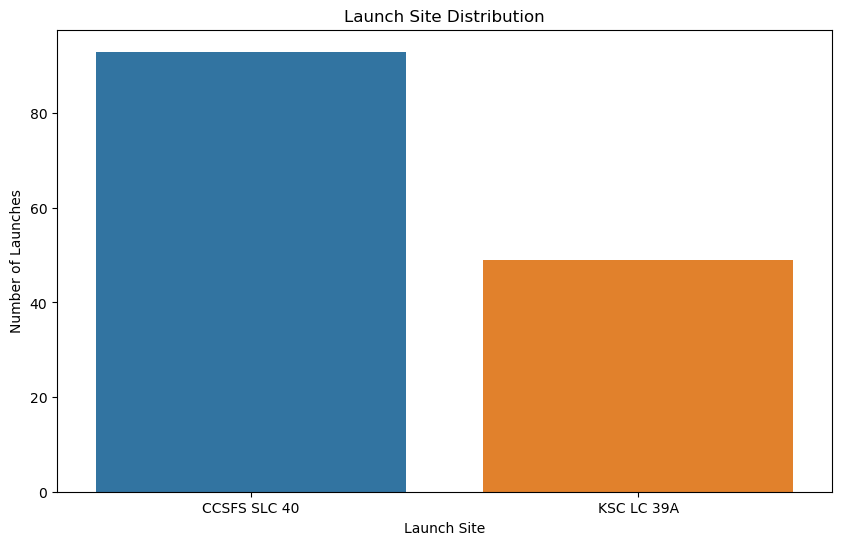

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='LaunchSite', data=df)
plt.title('Launch Site Distribution')
plt.xlabel('Launch Site')
plt.ylabel('Number of Launches')
plt.show()


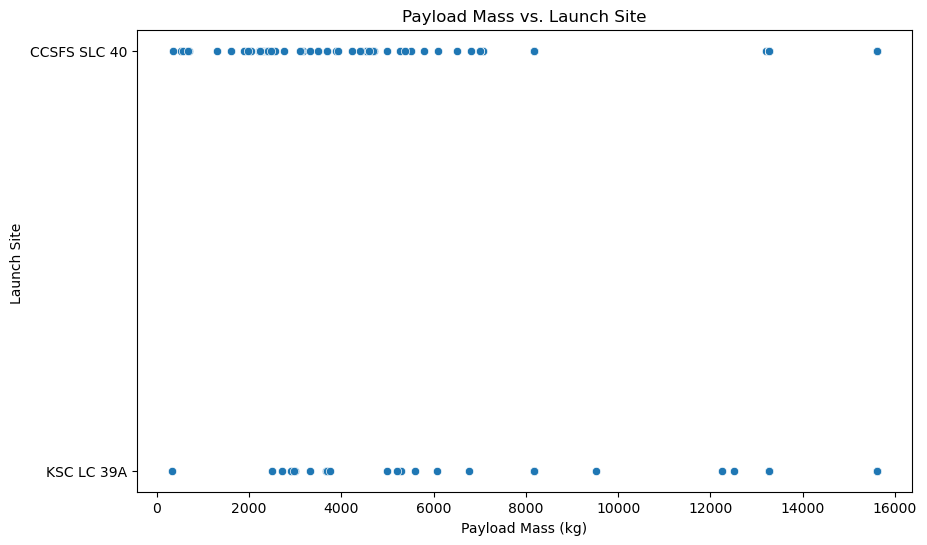

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PayloadMass', y='LaunchSite', data=df)
plt.title('Payload Mass vs. Launch Site')
plt.xlabel('Payload Mass (kg)')
plt.ylabel('Launch Site ')
plt.show()


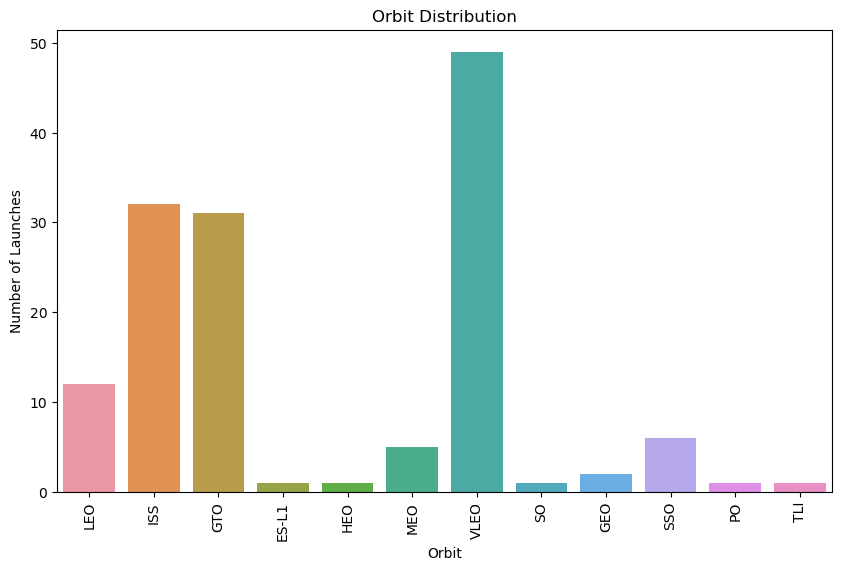

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Orbit', data=df)
plt.title('Orbit Distribution')
plt.xlabel('Orbit')
plt.ylabel('Number of Launches')
plt.xticks(rotation=90)
plt.show()



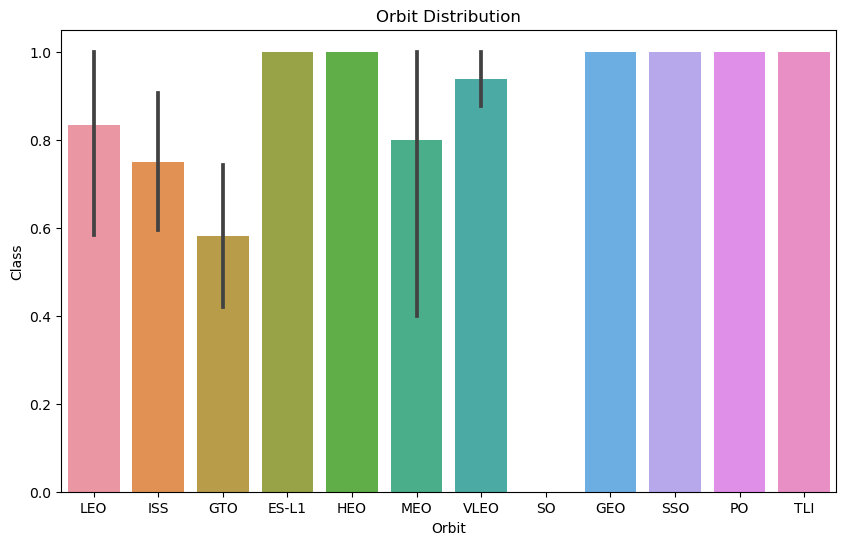

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Orbit', y='Class', data=df)
plt.title('Orbit Distribution')
plt.xlabel('Orbit')
plt.ylabel('Class')

plt.show()


c:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Omar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


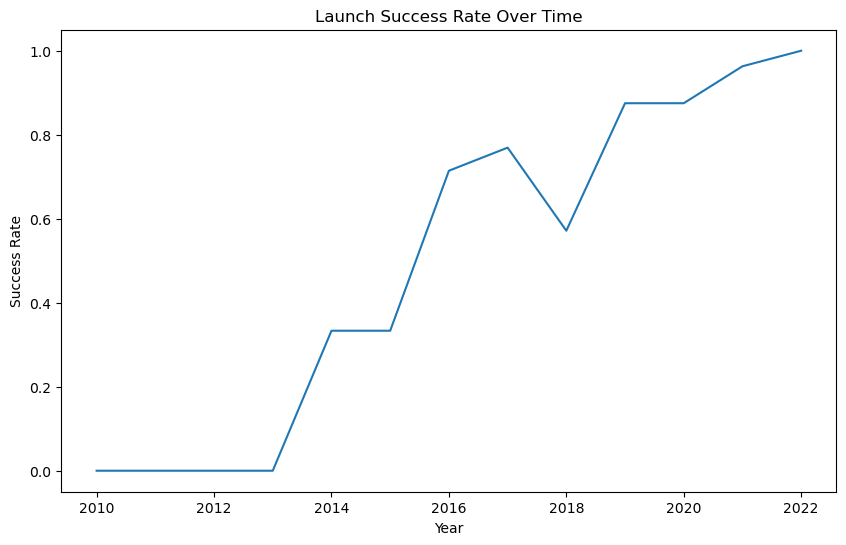

In [20]:
df['Date'] = pd.to_datetime(df['Date'])
success_rate_over_time = df.groupby(df['Date'].dt.year)['Class'].mean()
plt.figure(figsize=(10, 6))
sns.lineplot(x=success_rate_over_time.index, y=success_rate_over_time.values)
plt.title('Launch Success Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.show()
